Eleni Paipeti s5350816


# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [96]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for ploting
import pylab # used for ploting related functions
import pingouin as pg # used for statistics
import scipy.stats as stats # used for statistics
import numpy as np #used for mathematical and statistical functions
df_mh = pd.read_csv('data for A1/MillerHadenData.csv')



Q1a (code):

In [124]:
#Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Non-frequent
2,3,45,81,108,640,Low,Non-frequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Non-frequent


"Participant" values are nominal data as it is assigned for identification purposes.
"Abil", "IQ" are interval data the difference betweeen them is meaningfull, while "Home" and "TV" are ratio data as there is a true zero point and the difference between them has a meaning.

In [98]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


 Q1b (code):

In [30]:
# Check for missing values
df_mh.isnull()

# Check whether there is a data point for each participant on both variables

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


There is a data point for each Participant on both variables.

### Normal Distribution

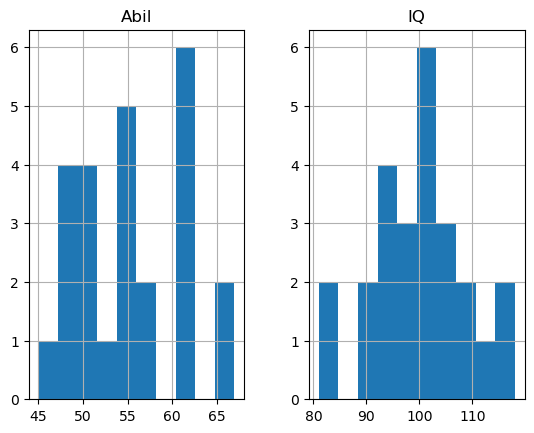

In [73]:
#Plot to see the distribution first

df_mh[['Abil', 'IQ']].hist()
plt.show()

In [5]:
# Q1c (code):
# Check data distribution

score_shapiro_abil, p_val_shapiro_abil = stats.shapiro(df_mh['Abil'])
score_shapiro_IQ, p_val_shapiro_IQ = stats.shapiro(df_mh['IQ'])
print(score_shapiro_abil, p_val_shapiro_abil)
print(score_shapiro_IQ, p_val_shapiro_IQ)

0.9487951397895813 0.2354906052350998
0.9636039137840271 0.49081143736839294


### Visualizing the Correlation

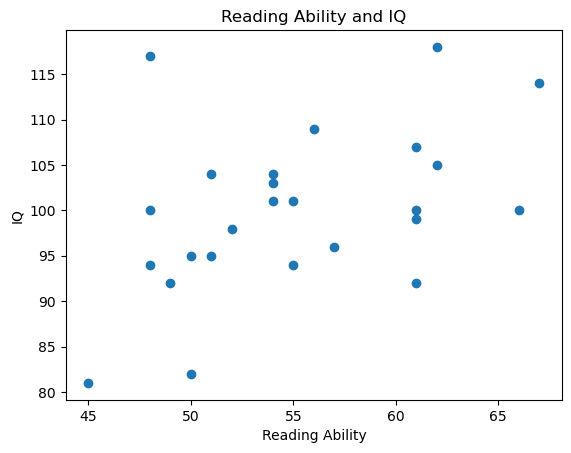

In [7]:
# Q1d (code):
# Scatter plot

plt.scatter(df_mh['Abil'], df_mh['IQ'])
plt.title('Reading Ability and IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

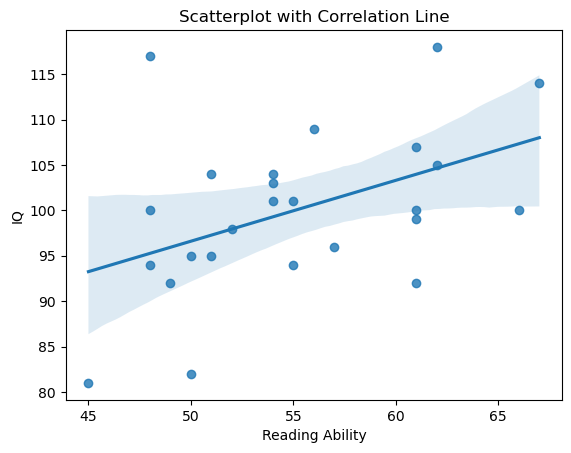

In [8]:
# Q1e (code):
# Correlation line
sns.regplot(x="Abil", y="IQ", data=df_mh)
plt.title("Scatterplot with Correlation Line")
plt.xlabel("Reading Ability")
plt.ylabel("IQ")
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

Q2a:

Based on the results of Question 1 it is my opinion, that we should use Pearson's Correlation Coefficient, our variables are approximately  normally distributed and we can see a linear relationship between them.

Q2b (code):

In [99]:
# Calculate Pearson correlation coefficient
pearson_corr = pg.corr(df_mh['Abil'], df_mh['IQ'], method='pearson')
pearson_corr

,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


Q2c (answer with words):

The (r) correlation coefficient measures strenght and direction of the linear relationship between the variables and in our case it is 0.45117, indicating moderate positive correlation. The p-value is 0.023593, less the 0.05 and therefore we reject the null hypothesis, as there is a statistically significant correlation between the two variables.The statistical power of the test, which measures the probability of correctly rejecting the null hypothesis when it is false, is approximately 0.640299, indicating a moderate level of power.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

### Stating the Hypothesis 

 Q3a:
 
 H0: There is no association between time spent reading at home and the reading ability of a person.
 
 H1：The time spent reading at home influences the reading ability of a person.

In [125]:
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for performin a chi-square test

Q3b:

Adding new columns

In [101]:
# First we need to find the rounded average of 'Abil' (Reading Ability)
r_avg_abil = round(df_mh['Abil'].mean())
r_avg_abil

55

In [102]:
#Create a new column 'Rank_Abil' based on the average we found
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x:'Low' if x <= r_avg_abil else 'High')

In [103]:
# Find the rounded average of 'Home'
r_avg_home = round(df_mh['Home'].mean())

#Create a new column 'Rank_Home' based on the average we found
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Non-frequent' if x <= r_avg_home else 'Frequent')

In [104]:
df_mh.head(5)

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Non-frequent
2,3,45,81,108,640,Low,Non-frequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Non-frequent


 Q3c:

 Construct Contingency Matrix


In [105]:
# to apply statistics we should create a subdataframe by grouping 
# code for contigency matrix
cont_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
cont_matrix

Rank_Home,Frequent,Non-frequent
Rank_Abil,,
High,8,2
Low,3,12


In [106]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cont_matrix)
print()
#Print the results
print("Chi-square Test Results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square Test Results:
Chi-square statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


 Q3e:

The Chi-square test shows a statistically significant result. The p-value is less than a commonly significant level set at 0.05, so we reject the null hypothesis (H0), and we can observe that there is a statistically significant assosiation between these two variables (reading ability and amount of time spent reading at home). Therefore, there is evident that the two variables are dependent of each other. 


## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [127]:

import pandas as pd # used for data wrangling 
from scipy import stats # used for statistics
import numpy as np # used for mathematical and statistical functions
import matplotlib.pyplot as plt ## used for plotting and visualizations
import seaborn as sns # used for visualizations

# Load the data
df_evaluators = pd.read_csv('data for A1/evaluators.csv')
df_evaluators.head(10)


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0
5,6,read,24.0,2.0
6,7,listened,29.0,2.0
7,8,read,23.0,2.0
8,9,listened,28.0,2.0
9,10,read,34.0,2.0


In [108]:
#Fist we need to check our data for any missing value
df_evaluators.isnull().any()

eval_id      False
condition    False
age           True
sex           True
dtype: bool

In [109]:
df_evaluators.isnull().any().count()

4

In [50]:
mean_age_with_null = df_evaluators['age'].mean()
mean_age_with_null

30.852941176470587

 Q4a:

In [110]:
# Calculate mean and standard deviation for age
# We know we have 2 null values and because our dataset is not that big it maybe changed the mean and standard diviation
# So I will calculate the mean() and .std() with the nulls and then I will fill them with the mean and calculate again

# Calculate the mean age of evaluators, including missing values
mean_age_with_null = df_evaluators['age'].mean()

# Fill missing values in the 'Age' column with the mean age
df_evaluators['age'] = df_evaluators['age'].fillna(mean_age_with_null)

mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

print('Mean age of evaluaters:')
print(mean_age)
print('Standard Deviation for age:')
print(std_age)

Mean age of evaluaters:
30.852941176470587
Standard Deviation for age:
5.813470532176367


In [111]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

male_evaluators = (df_evaluators['sex'] == 1).sum()
female_evaluators = (df_evaluators['sex'] == 2).sum()

print('Number of male evaluators:', male_evaluators)
print('Number of female evaluators:', female_evaluators)

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [129]:
# Load ratings data
df_ratings = pd.read_csv('data for A1/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [113]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ['thoughtful', 'competent', 'intelligent']
df_ratings_filtered = df_ratings[df_ratings['Category'].isin(categories)]

# Calculate the mean intellect rating for each evaluator
mean_rate = df_ratings_filtered.groupby('eval_id')['Rating'].mean()
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_rating = mean_rate.reset_index()

In [114]:
intellect_rating.head()

,eval_id,Rating
0,1,6.000000
1,2,5.666667
2,3,6.000000
3,4,3.333333
4,5,1.000000


In [115]:
# Add a 'Category' column with the value 'intellect' for these rows
intellect_rating['Category'] = 'intellect'
# Create a DataFrame for 'impression' and 'hire' ratings

df_impression = df_ratings[df_ratings['Category'] == 'impression']

df_hire = df_ratings[df_ratings['Category'] == 'hire']

In [116]:
# Combine the DataFrames to create 'ratings2'
ratings2 = pd.concat([df_impression, df_hire])
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([ratings2, intellect_rating])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')

# Select only the necessary columns as per the structure required

ratings2 = ratings2[['eval_id', 'condition', 'Category', 'Rating']]
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,condition,Category,Rating
1,1,listened,hire,6.000000
0,1,listened,impression,7.000000
2,1,listened,intellect,6.000000
4,2,listened,hire,4.000000
3,2,listened,impression,4.666667


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



Q6a (answer in words):


Null hypothesis:(HO)

There is no significant difference in overall ratings on "intellect" and "hire" (or "impression") between evaluators who listened to pitches and evaluators who read pitches. (HO: μ_listen = μ_read)

Alternative hypothesis:(H1)

There is significant difference in overall ratings on "intellect" and "hire"between evaluators who listened to the pitches and evaluators who read the pitches. (H1(tow-tailed)): μ_listen ≠ μ_read) 

In [ ]:
# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

 Q6b (answer in words):
 
 Which t-test should we choose, one-tail or two-tail? Explian why.

For "intellect","hire" and "impression ratings, it is more suitable to chose a two-tailed t-test because we are interested in whether there is any difference in ratings between the two groups, without specifying the direction of the difference..

Q6c (answer in words):

What are the independent variable and the dependent variable here?


The independet variable here is the "condition" (listen vs. read)
The dependent variables are the overall ratings ("intellect","hire", "impression")


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [121]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu # used for statistical testing 

# Descriptive analysis of the ratings

descriptive_stats = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

descriptive_stats

count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.666667  7.000000

In [118]:
# Before running the shapiro test we need to create sub datafrmes for each category
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']
impression_ratings = ratings2[ratings2['Category'] == 'impression']
hire_ratings = ratings2[ratings2['Category'] == 'hire']

# Test for normal distribution (Shapiro-Wilk test)
score_shapiro_intellect, p_val_shapiro_intellect = shapiro(intellect_ratings['Rating'])
print('Shapiro-Wilk Intellect Score:', score_shapiro_intellect)
print('Shapiro-Wilk Intellect P-Value:', p_val_shapiro_intellect)
print('')

score_shapiro_hire, p_val_shapiro_hire = shapiro(hire_ratings["Rating"])
print("Shapiro-Wilk Hire Score:", score_shapiro_hire)
print("Shapiro-Wilk Hire P-Value:", p_val_shapiro_hire)
print('')

score_shapiro_impression, p_val_shapiro_impression = shapiro(impression_ratings["Rating"])
print("Shapiro-Wilk Impression Score:", score_shapiro_impression)
print("Shapiro-Wilk Impression P-Value:", p_val_shapiro_impression)

Shapiro-Wilk Intellect Score: 0.9747602939605713
Shapiro-Wilk Intellect P-Value: 0.5182666182518005

Shapiro-Wilk Hire Score: 0.9427909851074219
Shapiro-Wilk Hire P-Value: 0.04710369557142258

Shapiro-Wilk Impression Score: 0.9595587849617004
Shapiro-Wilk Impression P-Value: 0.17238670587539673


We can see that for intellect and impression the p-value > 0.05 indicating normality, while hire's p-value is less than 0.05, indicate that the sample may not be normally distributed and we need a non-parametric test.
Thus, we will use a different t-test for hire, the Mann-Whiotney t-test.

In [122]:
# Test for homogeneity of variances (Levene's test)
# Test for homogeneity of variances (Levene's test)
intellect_levene = ratings2[ratings2['Category'] == 'intellect']['Rating']
impression_levene = ratings2[ratings2['Category'] == 'impression']['Rating']
hire_levene = ratings2[ratings2['Category'] == 'hire']['Rating']


statistic, p_value = levene(intellect_levene, impression_levene, hire_levene)
if p_value < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [123]:
# Independent t-tests
# Independent t-tests
intellect_listened = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']

impression_listened = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']

hire_listened = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']

# Run the tests
t_stat_intellect, p_val_intellect = ttest_ind(intellect_listened, intellect_read)
t_stat_impression, p_val_impression = ttest_ind(impression_listened, impression_read)
t_stat_hire, p_val_hire = mannwhitneyu(hire_listened, hire_read)

if p_val_intellect < 0.05:
    print("Reject the null hypothesis for intellect, as there is significant statistical difference between the ratings")
else:
    print("There is no significant difference. Fail to reject the null hypothesis for intellect.")

if p_val_impression < 0.05:
    print("Reject the null hypothesis for impression, as there is significant statistical difference between the ratings")
else:
    print("There is no significant difference.Fail to reject the null hypothesis for impression.")

if p_val_hire < 0.05:
    print("Reject the null hypothesis for hire, as there is significant statistical difference between the ratings")
else:
    print("There is no significant difference. Fail to reject the null hypothesis for hire")

Reject the null hypothesis for intellect, as there is significant statistical difference between the ratings
Reject the null hypothesis for impression, as there is significant statistical difference between the ratings
Reject the null hypothesis for hire, as there is significant statistical difference between the ratings


Q7b (answer in words):

From the descriptive statistics we can get a first glimpse to measures such as mean, standard deviation etc. That way we can have an overview of the distribution of ratings for each group, in our case "read" and "listen" and we can identify some main patters and observation for each type of ratings. With the Shapiro-Wilk Test we are checking  if the sample comes from a normally distributed population. We performed the test for each rating category and each condition to check the normality that is required for running t-tests.If the p-value is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis, indicating that the data may be normally distributed.
If the p-value is less than the significance level, we reject the null hypothesis, suggesting that the data may not be normally distributed Then we use Levene's test to check the assumption of homogeneity of variances required for t-tests.
If the p-value is greater than the chosen significance level, we fail to reject the null hypothesis, indicating that the variances are approximately equal across groups.
If the p-value is less than the significance level, we reject the null hypothesis, suggesting that the variances are not equal across group Then we run two tailed t-test for each rating searching the difference between the means of the two variables listened or read. Intellect and impression after the results from Shapiro and Levene's test showed that we needed to perform a parametric test, while hire showd us from shapiro test that the distribution was not normal and therefore, a non-parametric test was more suitable. After running the tests we show that all p-values were less than 0.05, indicating that we can reject the null hypothesis for all types of rating. This means that there is sufficient evidence that there is a significant statistical difference in the mean ratings of intellect, hire, and impression between the evaluators who read and those who listened to pitches. s..